<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AB-Testing" data-toc-modified-id="AB-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AB-Testing</a></span></li></ul></div>

# AB-Testing

![cats](images/cats.jpeg)


Imaginad que somos los cientificos de datos de la empresa de videojuegos Tactile Entertainment. Los desarrolladores del juego Cookie Cats pretenden introducir un cambio en el juego para aumentar la retencion de los jugadores. En cierto nivel del juego los jugadores se encuentran una puerta que les obliga a esperar o a pagar la app. Actualmente la puerta se encuentra en nivel 30 y se pretende pasar al nivel 40, para comprobar la retencion a 1 y 7 dias. Antes de realizar el cambio definitivo en el juego se raliza un test AB.

Los datos estan alojados en `data/cookie_cats.csv`. Nuestro grupo de control sera la version actual `gate_30` y el grupo de tratamiento sera la version `gate_40`. Debemos realizar el test para 1 dia de retencion `retention_1` y para 7 dias `retention_7`.

In [110]:
# librerias

import pandas as pd
import numpy as np

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem
from scipy.stats import bernoulli, beta
from bayes import *
import pylab as plt

In [111]:
# datos
data= pd.read_csv('data/cookie_cats.csv')
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [113]:
# testeo para retention_1
impresiones_gate30 = data[data['version'] =='gate_30']
len(impresiones_gate30)

44700

In [114]:
conversiones_gate30 = data[(data.version =='gate_30')&(data.retention_1 ==True)]
len(conversiones_gate30)

20034

In [115]:
impresiones_gate40=data[data['version'] =='gate_40']
len(impresiones_gate40)

45489

In [116]:
conversiones_gate40 = data[(data.version =='gate_40')&(data.retention_1 ==True)]
len(conversiones_gate40)

20119

In [117]:
imps_ctrl, convs_ctrl = 44700, 20034
imps_test, convs_test = 45489, 20119
CR_ctrl= convs_ctrl/imps_ctrl
CR_test= convs_test/imps_test
f'Tasas conversion: Control: {CR_ctrl}, Test: {CR_test}'

'Tasas conversion: Control: 0.4481879194630872, Test: 0.44228274967574577'

In [118]:
# a prioris

a_C, b_C = 1+convs_ctrl, 1+imps_ctrl-convs_ctrl

a_T, b_T = 1+convs_test, 1+imps_test-convs_test


beta_control = beta(a_C, b_C)

beta_test = beta(a_T, b_T)

In [119]:
beta_control.mean(), beta_test.mean()

(0.44819023757326293, 0.44228528719966587)

In [120]:
def plot(betas, names, linf=0.42, lsup=0.46):
    
    x=np.linspace(linf, lsup, 100)
    
    for f, n in zip(betas, names):
        
        y=f.pdf(x)
        y_pico=pico(f.args[0], f.args[1])
        y_var=f.var()
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(n, y_pico, y_var))
        plt.yticks([])
        
    plt.legend()
    
    plt.show();

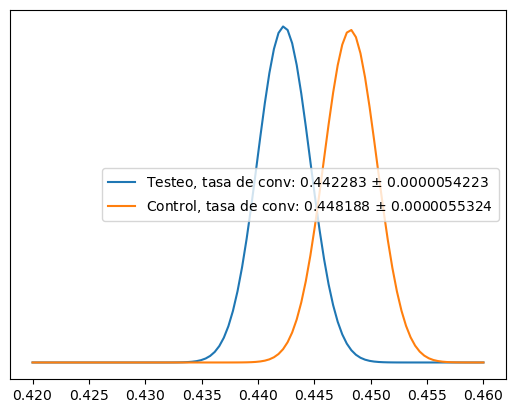

In [121]:
plot([beta_test, beta_control], ['Testeo', 'Control'])

In [122]:
salto= (beta_control.mean() - beta_test.mean())/beta_test.mean()

salto

0.01335099887899125

In [123]:
calc_prob(beta_control, beta_test)

0.9627939748515354

In [139]:
# testeo para retention_7
impresiones_gate30_ = data[data['version'] =='gate_30']
len(impresiones_gate30_)

44700

In [141]:
conversiones_gate30_ = data[(data.version =='gate_30')&(data.retention_7 ==True)]
len(conversiones_gate30_)

8502

In [142]:
impresiones_gate40_=data[data['version'] =='gate_40']
len(impresiones_gate40_)

45489

In [143]:
conversiones_gate40_ = data[(data.version =='gate_40')&(data.retention_7 ==True)]
len(conversiones_gate40_)

8279

In [144]:
imps_ctrl_, convs_ctrl_ = 44700, 8502
imps_test_, convs_test_ = 45489, 8279
CR_ctrl_= convs_ctrl_/imps_ctrl_
CR_test_= convs_test_/imps_test_
f'Tasas conversion: Control: {CR_ctrl_}, Test: {CR_test_}'

'Tasas conversion: Control: 0.19020134228187918, Test: 0.18200004396667327'

In [147]:
# a prioris

a_C, b_C = 1+convs_ctrl_, 1+imps_ctrl_-convs_ctrl_

a_T, b_T = 1+convs_test_, 1+imps_test_-convs_test_


beta_control_ = beta(a_C, b_C)

beta_test_ = beta(a_T, b_T)

In [148]:
beta_control_.mean(), beta_test_.mean()

(0.19021520289919913, 0.18201402475214878)

In [152]:
def plot(betas, names, linf=0.17, lsup=0.2):
    
    x=np.linspace(linf, lsup, 100)
    
    for f, n in zip(betas, names):
        
        y=f.pdf(x)
        y_pico=pico(f.args[0], f.args[1])
        y_var=f.var()
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(n, y_pico, y_var))
        plt.yticks([])
        
    plt.legend()
    
    plt.show();

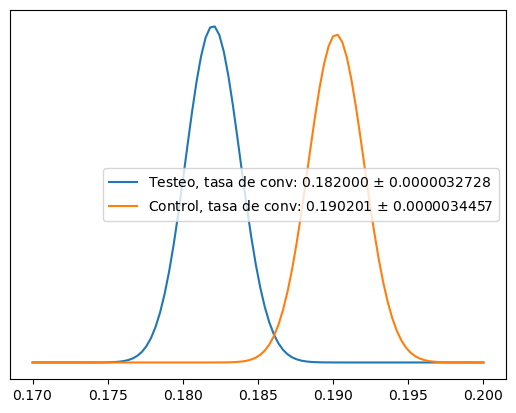

In [153]:
plot([beta_test_, beta_control_], ['Testeo', 'Control'])

In [154]:
salto_= (beta_control_.mean() - beta_test_.mean())/beta_test_.mean()

salto_

0.04505794626660234

In [155]:
calc_prob(beta_control_, beta_test_)

0.9992226613235504

# Conclusiones

*Los usuarios ya están realizando pagos al alcanzar el nivel 30 del juego, por lo que implementar modificaciones con el objetivo de incrementar la retención de los jugadores (subir 10 niveles)carece de justificación.*